In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import math

In [2]:
def init_pos(taille):
    liste_tupple = []
    plateau = taille*taille 
    for i in range(taille):
        for j in range(taille):
            liste_tupple.append((i,j))
    return liste_tupple

In [3]:
def liste_langue(nbr_langue):
    liste_langue = []
    i = 0
    for i in range(nbr_langue):
        liste_langue.append(0)
    return liste_langue

In [4]:
pos = init_pos(8)
langue = liste_langue(4)

In [5]:
pos

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7)]

In [6]:
def pos1(pos):
    i=0
    i2 = 0
    nbr_pop=[]
    s= set()
    n2 = 0
    for e in range(len(langue)):
        l=random.randint(0,len(pos)-1)
        while l in s:
            l=random.randint(0,len(pos)-1)
       
        s.add(l) #positionnement
   
    #for i2 in pos:
      #  x,y,n = i2
       # if i in s:
        #    for i2 in pos:
         #       n2 = random.randint(800,1000)
          #      if n2 != n:
                   
           #         i2 = (x, y, n2)
            #        pos[i] = i2
             #   else :
              #      n2 = random.randint(800,1000)
               #     i2 = (x, y, n2)
                #    pos[i] = i2
                   
               
      #  i = i +1
       
                   
           
    return s

In [7]:
rep = pos1(pos)
rep

{3, 9, 11, 43}

In [8]:
langue

[0, 0, 0, 0]

In [9]:
def init_pop(pos, langue, s):
    pop = dict()

    for e in pos: 
            
        pop[e] = langue.copy()
        
        
    return pop


In [10]:
pop = init_pop(pos, langue, pos1(pos))
pop

{(0, 0): [0, 0, 0, 0],
 (0, 1): [0, 0, 0, 0],
 (0, 2): [0, 0, 0, 0],
 (0, 3): [0, 0, 0, 0],
 (0, 4): [0, 0, 0, 0],
 (0, 5): [0, 0, 0, 0],
 (0, 6): [0, 0, 0, 0],
 (0, 7): [0, 0, 0, 0],
 (1, 0): [0, 0, 0, 0],
 (1, 1): [0, 0, 0, 0],
 (1, 2): [0, 0, 0, 0],
 (1, 3): [0, 0, 0, 0],
 (1, 4): [0, 0, 0, 0],
 (1, 5): [0, 0, 0, 0],
 (1, 6): [0, 0, 0, 0],
 (1, 7): [0, 0, 0, 0],
 (2, 0): [0, 0, 0, 0],
 (2, 1): [0, 0, 0, 0],
 (2, 2): [0, 0, 0, 0],
 (2, 3): [0, 0, 0, 0],
 (2, 4): [0, 0, 0, 0],
 (2, 5): [0, 0, 0, 0],
 (2, 6): [0, 0, 0, 0],
 (2, 7): [0, 0, 0, 0],
 (3, 0): [0, 0, 0, 0],
 (3, 1): [0, 0, 0, 0],
 (3, 2): [0, 0, 0, 0],
 (3, 3): [0, 0, 0, 0],
 (3, 4): [0, 0, 0, 0],
 (3, 5): [0, 0, 0, 0],
 (3, 6): [0, 0, 0, 0],
 (3, 7): [0, 0, 0, 0],
 (4, 0): [0, 0, 0, 0],
 (4, 1): [0, 0, 0, 0],
 (4, 2): [0, 0, 0, 0],
 (4, 3): [0, 0, 0, 0],
 (4, 4): [0, 0, 0, 0],
 (4, 5): [0, 0, 0, 0],
 (4, 6): [0, 0, 0, 0],
 (4, 7): [0, 0, 0, 0],
 (5, 0): [0, 0, 0, 0],
 (5, 1): [0, 0, 0, 0],
 (5, 2): [0, 0, 0, 0],
 (5, 3): [0

In [11]:
def repartion_init_langues(pop, s):
    a = 0
    i = 0
    for e in pop:
        if i in s:           
            (pop[e])[a] = random.randint(800,1000)
            a = a + 1
        i = i+1
    return pop


In [12]:
finit = repartion_init_langues(pop, rep)

In [13]:
def affect_array(dicto, size=3, nb_langues=3):
    """
    
    """
    array = np.empty((size, size, nb_langues))
    for index, values in dicto.items():
        array[index] = values
    
    return array

In [14]:
def expansion(finit, tupl):
    x, y = tupl
    x1 = len(finit)
    y1 = len(finit)
    
  
    j = 0

    
    
    for i in finit[(x,y)]:
        x1 = len(finit)
        y1 = len(finit)
        while x+x1 < 0 or x+x1 >= math.sqrt(len(finit)) or y+y1 < 0 or y+y1>=math.sqrt(len(finit)):
            x1 = random.randint(-1,1)
            y1 = random.randint(-1,1)
            
        if i > 200: #utiliser les indices plutot que les cases non nuls
            nb = random.randint(100,200)
            finit[(x,y)][j] = finit[(x,y)][j] - nb
            finit[(x+x1, y+y1)][j] = finit[(x+x1, y+y1)][j] + nb
    
        j = j+1
    
    return finit

In [15]:
def evolution(finit):
    
    a = 0

    for (x,y) in finit:
        for i in finit[(x,y)]:
            if i != 0: 
                a = 1
                
                
        if a == 1:
            finit = expansion(finit, (x,y))
            
            a = 0
                
                
    return finit

In [16]:
i=0
while i<= 30:
    evolution(finit)
    i=i+1

In [17]:
gentil = affect_array(finit, 8, 4)
print(gentil)

[[[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0. 166.]
  [  0.   0.   0.  56.]
  [  0.   0.   0. 187.]
  [  0. 169.   0. 101.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0. 119.   0.  50.]
  [  0. 172.   0.  61.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0. 140.   0.   0.]
  [  0. 170. 159. 145.]
  [  0. 117. 198.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0. 162.   0.]
  [  0.   0. 146.   0.]
  [  0.   0. 197. 108.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0

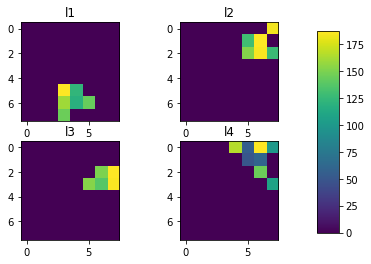

In [18]:
fig, ax = plt.subplots(2, 2)
im = ax[0, 0].imshow(gentil[:,:,0])
ax[0,0].set_title("l1")
im = ax[0, 1].imshow(gentil[:,:,1])
ax[0,1].set_title("l2")
im = ax[1, 0].imshow(gentil[:,:,2])
ax[1,0].set_title("l3")
im = ax[1, 1].imshow(gentil[:,:,3])
ax[1,1].set_title("l4")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [19]:
def evolution_intra_case(finit,tupl):
    l=[]
    finit_finale=finit
    total_pop = 0
    if finit[tupl] != [0, 0, 0, 0, 0]:
        for i in finit[tupl]:
            total_pop+=i
        for i in finit[tupl]:
            l.append(i/total_pop)
    for i in range(len(l)):
        if l[i]>0.6:
            finit_finale[tupl][i]=finit[tupl][i]
            for j in range(len(finit[tupl])):
                if i!=j:
                    finit_finale[tupl][j]=int(finit[tupl][j]*0.9)
                    finit_finale[tupl][i]+=int(finit[tupl][j]*0.9)
                   
    return finit_finale